['A', 'B', 'C', 'D', 'E']
[('A', 'B'), ('A', 'C'), ('A', 'D'), ('C', 'E'), ('D', 'E')]


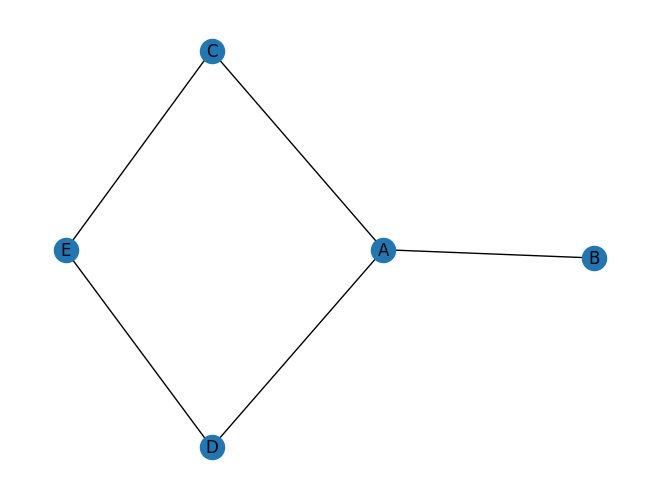

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.Graph()
g.add_node("A")
g.add_nodes_from(["B", "C", "D", "E"])
g.add_edge("A", "B")
g.add_edges_from([("A", "C"), ("E", "C"), ("E", "D"), ("A", "D")])
print(g.nodes)
print(g.edges)

nx.draw(g, with_labels=True)
plt.show()

In [ ]:
# Degree Centrality
for node in g.nodes:
    print(node, g.degree(node)/(len(g.nodes)-1))

# Closeness Centrality
adj = [[0, 1, 1, 1, 2], [1, 0, 2, 2, 3], [1, 2, 0, 2, 1], [1, 2, 2, 0, 1], [2, 3, 1, 1, 0]]
for node in range(len(g.nodes)):
    print(1/sum(adj[node]))

# Betweenness Centrality


A 0.75
B 0.25
C 0.5
D 0.5
E 0.5
0.2
0.125
0.16666666666666666
0.16666666666666666
0.14285714285714285


In [ ]:
# BFS
def bfs(graph, start):
    node = start
    queue = []
    visited = []
    while len(visited) < len(graph.nodes):
        print(node)
        visited.append(node)
        for nod in graph.adj[node]:
            if nod not in visited:
                queue.append(nod)
        node = queue.pop(0)

# DFS
def dfs(graph, node, visited=[]):
    print(node)
    visited.append(node)
    for nod in graph.adj[node]:
        if nod not in visited:
            dfs(graph, nod, visited)

bfs(g, "A")
print()
dfs(g, "A")

A
B
C
D
E

A
B
C
E
D


In [ ]:
# Trim edges for Island Method
def trim(g, weight=1):
    g2 = nx.Graph()
    for i, j, edge in g.edges(data=True):
        if edge["weight"] > weight:
            g2.add_edge(i, j, edge)
    return g2

def island(g, iter=5):
    weights = [edge["weight"] for i, j, edge in g.edges(data=True)]
    min_wt = min(weights)
    max_wt = max(weights)
    step = int((max_wt - min_wt)/iter)
    return [[lvl, trim(g, lvl)] for lvl in range(min_wt, max_wt, step)]

islands = island(g, 5)
for i in islands:
    print(i[0], len(i[1]), len(nx.connected_component_subgraphs(i[0])))
